In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-3-307b795b0ac3>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


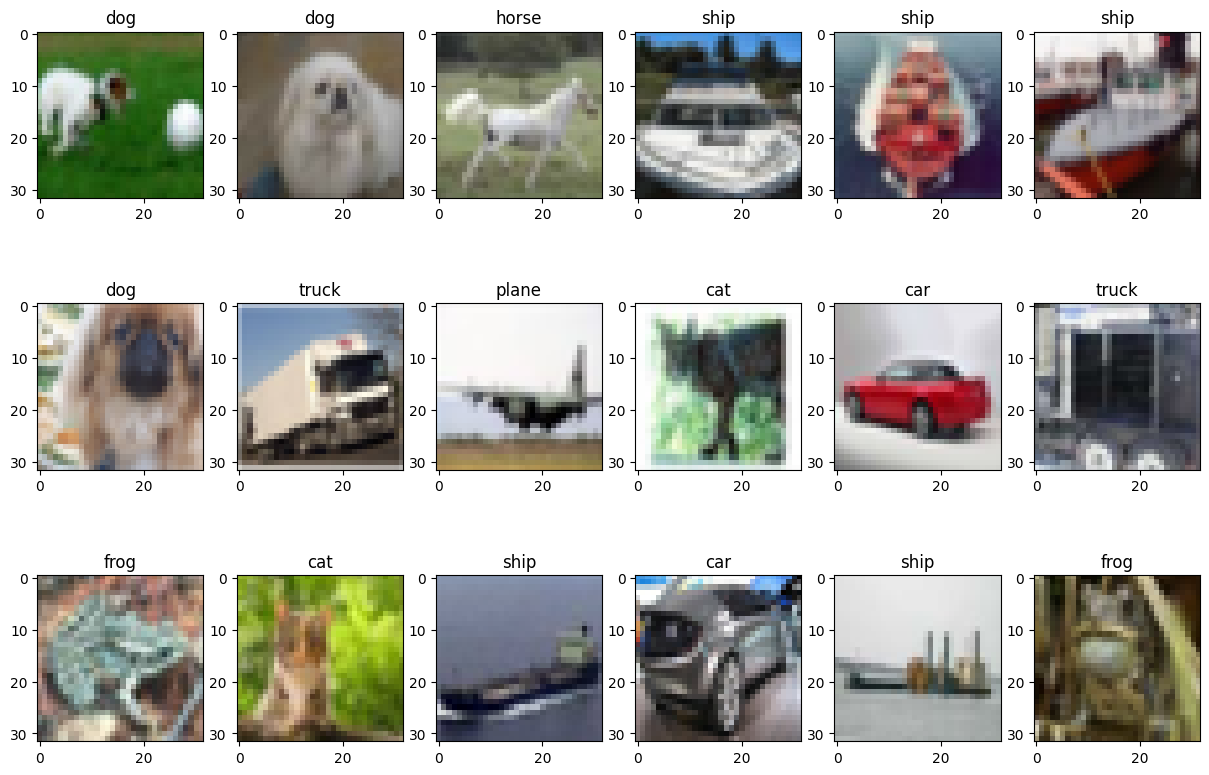

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Class counts: Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


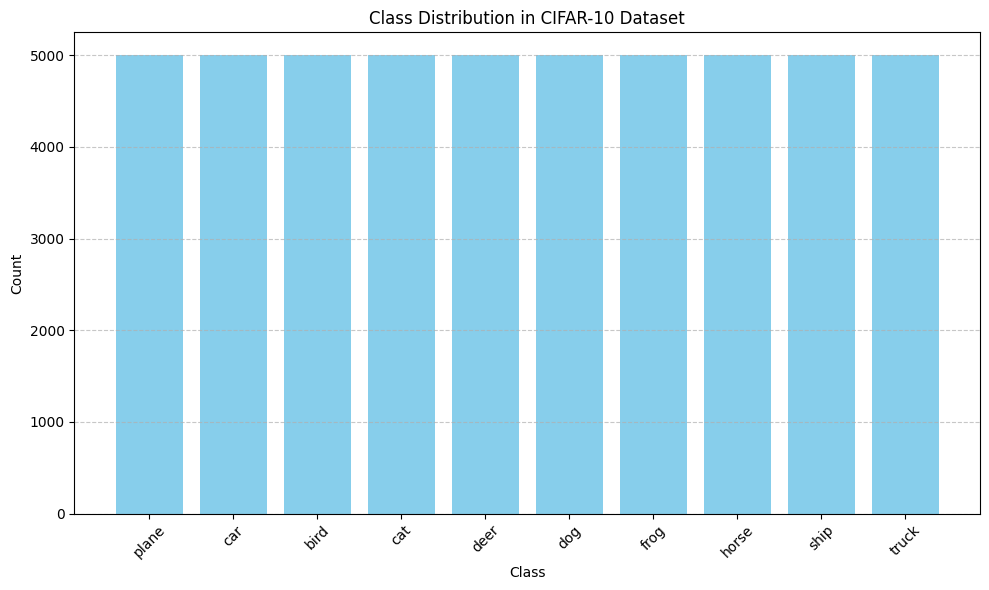

The dataset is balanced.


In [4]:
from collections import Counter

# Compute the class histogram
class_counts = Counter(y_train.flatten())
print("Class counts:", class_counts)

# Visualize the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(list(class_counts.keys()), [classes[k] for k in class_counts.keys()], rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in CIFAR-10 Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check if the dataset is balanced
mean_count = np.mean(list(class_counts.values()))
max_diff = max(abs(count - mean_count) for count in class_counts.values())

if max_diff / mean_count < 0.1:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")


In [6]:
from tensorflow.keras.utils import to_categorical
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)


Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [12]:
from tensorflow.keras.models import Sequential


# Build the classifier
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

# Show the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=25,
    batch_size=128,
    verbose=2
)

print("Training complete!")

Epoch 1/25
391/391 - 54s - 139ms/step - accuracy: 0.1813 - loss: 2.1900 - val_accuracy: 0.2381 - val_loss: 2.0687
Epoch 2/25
391/391 - 81s - 207ms/step - accuracy: 0.2687 - loss: 2.0230 - val_accuracy: 0.2814 - val_loss: 1.9839
Epoch 3/25
391/391 - 52s - 133ms/step - accuracy: 0.3036 - loss: 1.9495 - val_accuracy: 0.3151 - val_loss: 1.9067
Epoch 4/25
391/391 - 52s - 133ms/step - accuracy: 0.3301 - loss: 1.8773 - val_accuracy: 0.3423 - val_loss: 1.8353
Epoch 5/25
391/391 - 82s - 210ms/step - accuracy: 0.3504 - loss: 1.8160 - val_accuracy: 0.3627 - val_loss: 1.7848
Epoch 6/25
391/391 - 80s - 206ms/step - accuracy: 0.3655 - loss: 1.7727 - val_accuracy: 0.3786 - val_loss: 1.7429
Epoch 7/25
391/391 - 50s - 128ms/step - accuracy: 0.3772 - loss: 1.7417 - val_accuracy: 0.3928 - val_loss: 1.7131
Epoch 8/25
391/391 - 84s - 216ms/step - accuracy: 0.3850 - loss: 1.7181 - val_accuracy: 0.3997 - val_loss: 1.6917
Epoch 9/25
391/391 - 52s - 134ms/step - accuracy: 0.3916 - loss: 1.6994 - val_accuracy: 

Train Acc      0.4675399959087372
Validation Acc 0.4715999960899353


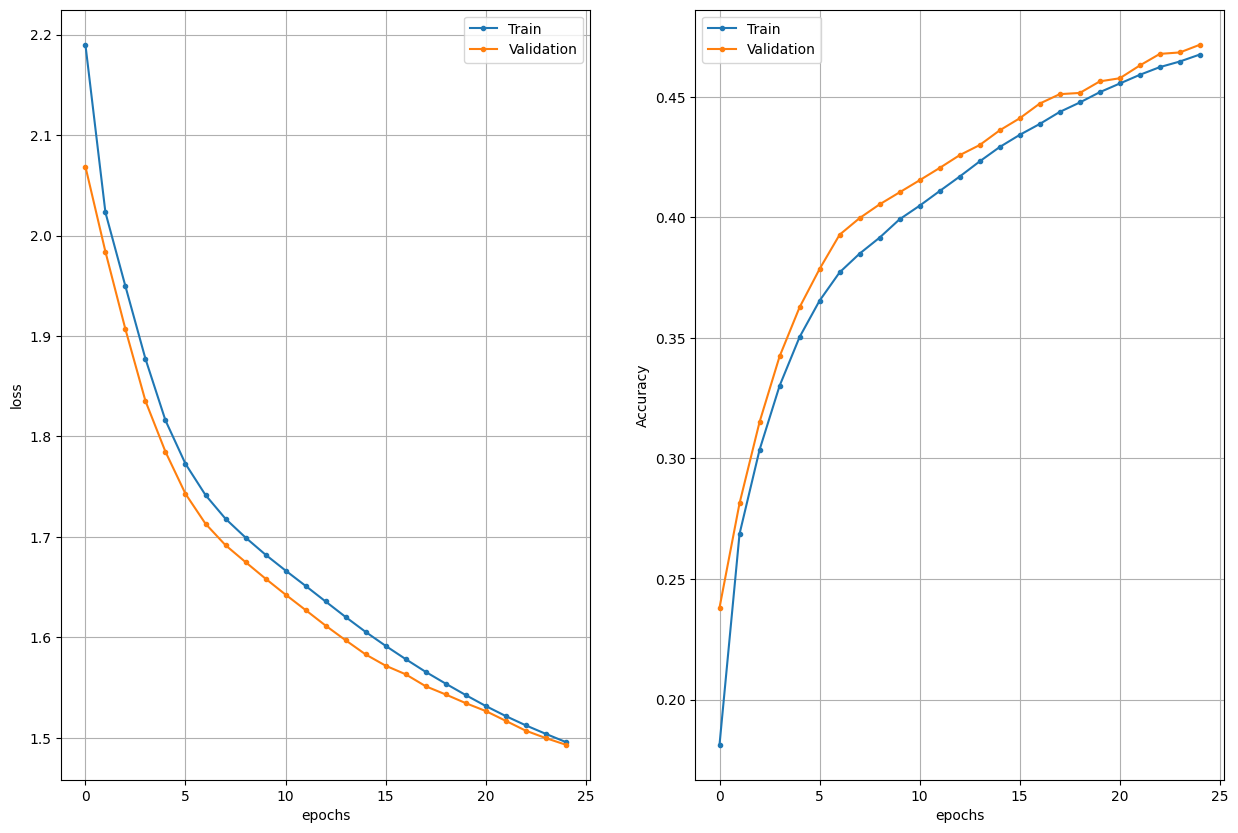

In [14]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [15]:
# Compute the labels as sparse values
y_true = np.argmax(y_test, axis=1)

# Compute the predictions as sparse values
y_pred = np.argmax(model.predict(x_test), axis=1)

print("True labels (sparse):", y_true[:10])
print("Predicted labels (sparse):", y_pred[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
True labels (sparse): [3 8 8 0 6 6 1 6 3 1]
Predicted labels (sparse): [3 1 1 8 4 6 3 6 5 1]


In [18]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():

    acc =(y_true == class_id).mean()
    print(class_name, acc)

plane 0.1
car 0.1
bird 0.1
cat 0.1
deer 0.1
dog 0.1
frog 0.1
horse 0.1
ship 0.1
truck 0.1


In [19]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4705 - loss: 1.4901
Test loss   1.4931037425994873
Test metric 0.4715999960899353


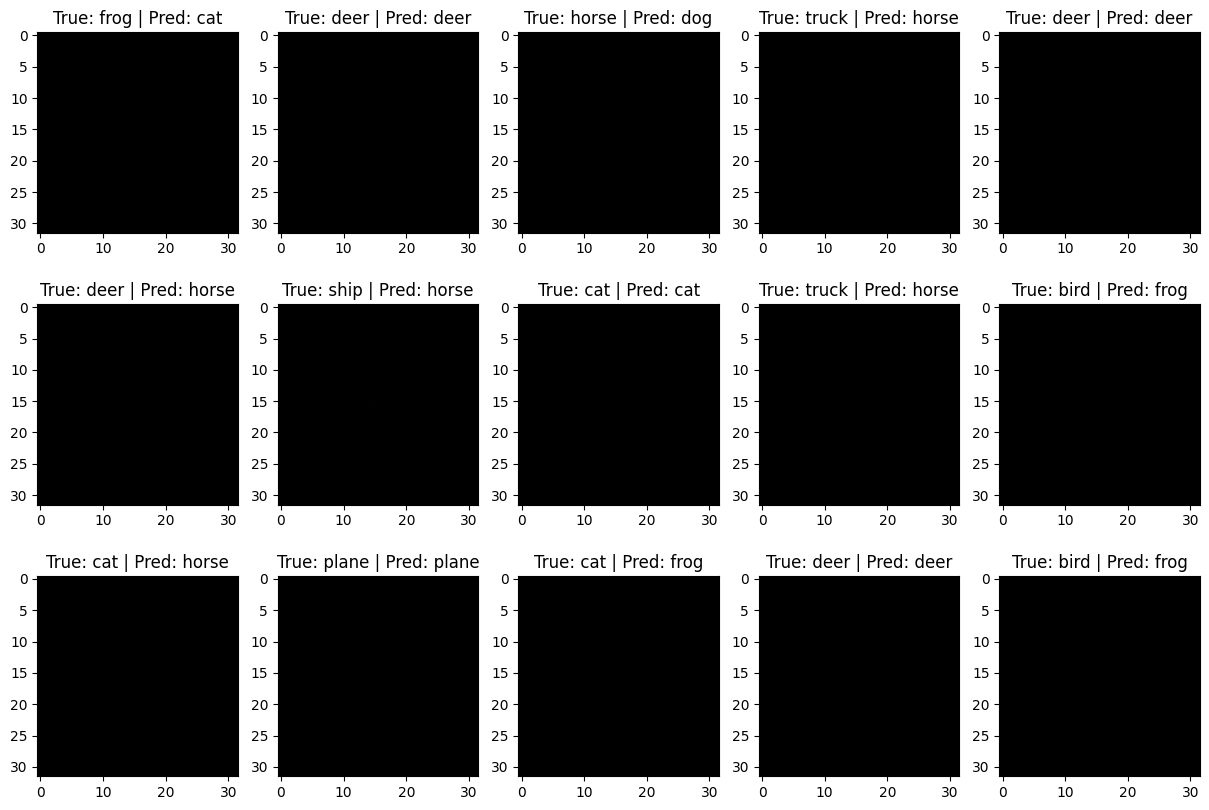

In [22]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))